# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

### Tesla

In [3]:
# What are the shapes of the dataframes?
df_tesla.shape

(124, 3)

In [4]:
# How many rows and columns?
rows = len(df_tesla)
columns = len(df_tesla.columns)
print(f'{rows = }, {columns = }')

rows = 124, columns = 3


In [5]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [6]:
# What are the column names?
for column in df_tesla.columns:
    print(column)

MONTH
TSLA_WEB_SEARCH
TSLA_USD_CLOSE


In [7]:
# Complete the f-string to show the largest/smallest number in the search data column
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [8]:
# Try the .describe() function to see some useful descriptive statistics
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [9]:
# What is the periodicity of the time series data (daily, weekly, monthly)?
'monthly'

'monthly'

What does a value of 100 in the Google Trend search popularity actually mean?

## How is Google Trends data normalized?
FAQ about Google Trends data - https://support.google.com/trends/answer/4365533?hl=en

Google Trends normalizes search data to make comparisons between terms easier. Search results are normalized to the time and location of a query by the following process:
- Each data point is divided by the total searches of the geography and time range it represents to compare relative popularity. Otherwise, places with the most search volume would always be ranked highest.
- The resulting numbers are then scaled on a range of 0 to 100 based on a topic’s proportion to all searches on all topics.
- Different regions that show the same search interest for a term don't always have the same total search volumes.

## Angela's Comments
### What do the Search Numbers mean?
We can see from our DataFrames that Google's search interest ranges between 0 and 100. But what does that mean? Google defines the values of search interest as: 

- Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term. 

Basically, the actual search volume of a term is not publicly available. Google only offers a scaled number. Each data point is divided by the total searches of the geography and time range it represents to compare relative popularity. 

For each word in your search, Google finds how much search volume in each region and time period your term had relative to all the searches in that region and time period. It then combines all of these measures into a single measure of popularity, and then it scales the values across your topics, so the largest measure is set to 100. In short: Google Trends doesn’t exactly tell you how many searches occurred for your topic, but it does give you a nice proxy.

Here are the Google Trends Search Parameters that I used to generate the .csv data:
- "Tesla", Worldwide, Web Search
- "Bitcoin", Worldwide, News Search
- "Unemployment Benefits", United States, Web Search
<img src="google_trends_parameters.png">

### Unemployment Data

In [10]:
df_unemployment.shape

(181, 3)

In [11]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [12]:
print(f'Largest value for "Unemployment Benefits" in Web Search: '
      f'{df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')
print(f'Smallest value for "Unemployment Benefits" in Web Search: '
      f'{df_unemployment["UE_BENEFITS_WEB_SEARCH"].min()}')

Largest value for "Unemployment Benefits" in Web Search: 100
Smallest value for "Unemployment Benefits" in Web Search: 14


### Bitcoin

In [13]:
df_btc_search.shape

(73, 2)

In [14]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [15]:
df_btc_price.shape

(2204, 3)

In [16]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [17]:
print(f'Largest BTC News Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')
print(f'Smallest BTC News Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].min()}')

Largest BTC News Search: 100
Smallest BTC News Search: 14


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [18]:
print(f'Missing values for Tesla?: {df_tesla.isna().value_counts(dropna=False)}')
print(f'Missing values for U/E?: {df_unemployment.isna().value_counts(dropna=False)}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().value_counts(dropna=False)}')

Missing values for Tesla?: MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
False  False            False             124
dtype: int64
Missing values for U/E?: MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
False  False                   False     181
dtype: int64
Missing values for BTC Search?: MONTH  BTC_NEWS_SEARCH
False  False              73
dtype: int64


In [19]:
# Angela's solution
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [20]:
print(f'Missing values for BTC price?: {df_btc_price.isna().value_counts(dropna=False)}')

Missing values for BTC price?: DATE   CLOSE  VOLUME
False  False  False     2203
       True   True         1
dtype: int64


In [21]:
# Angela's solution
print(f'Missing values for Tesla?: {df_btc_price.isna().values.any()}')

Missing values for Tesla?: True


In [22]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


Find the missing values

In [23]:
df_btc_price['CLOSE'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2199    False
2200    False
2201    False
2202    False
2203    False
Name: CLOSE, Length: 2204, dtype: bool

In [24]:
# Create a subset of the DataFrame for which .isna() == True
df_btc_price[df_btc_price['CLOSE'].isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found. 

In [25]:
# Remove the row with no values
df_btc_price_clean = df_btc_price[df_btc_price['CLOSE'].isna() == False]
df_btc_price_clean

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


In [26]:
# Angela's solution
df_btc_price.dropna(inplace=True)
df_btc_price

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [27]:
print(type(df_tesla.MONTH[1]))
print(type(df_unemployment.MONTH[1]))
print(type(df_btc_search.MONTH[1]))
print(type(df_btc_price.DATE[1]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [28]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [29]:
print(type(df_tesla.MONTH[1]))
print(type(df_unemployment.MONTH[1]))
print(type(df_btc_search.MONTH[1]))
print(type(df_btc_price.DATE[1]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [30]:
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>
[Pandas DateOffset Objects and Frequency Strings](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) <br>

In [31]:
# Resample to get the last available price of the month, i.e. the price at month-end
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()
df_btc_monthly

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,3.470730e+07
2014-10-31,2014-10-31,338.321014,1.254540e+07
2014-11-30,2014-11-30,378.046997,9.194440e+06
2014-12-31,2014-12-31,320.192993,1.394290e+07
2015-01-31,2015-01-31,217.464005,2.334820e+07
...,...,...,...
2020-05-31,2020-05-31,9461.058594,2.777329e+10
2020-06-30,2020-06-30,9137.993164,1.573580e+10
2020-07-31,2020-07-31,11323.466797,2.316047e+10


In [32]:
# Check same number of rows
print(df_btc_search.shape)
print(df_btc_monthly.shape)

(73, 2)
(73, 3)


In [33]:
# Resample to get the average price over the course of the month
df_btc_monthly_mean = df_btc_price.resample('M', on='DATE').mean()
df_btc_monthly_mean

,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07
...,...,...
2020-05-31,9263.151745,4.149575e+10
2020-06-30,9489.227214,2.169711e+10
2020-07-31,9589.899729,1.760688e+10


# Data Visualisation

### Notebook Formatting & Style Helpers
 - .figure() - resize the chart: plt.figure(figsize=(16,10))
 - .xticks() - configures the x-axis: plt.xticks()
 - .yticks() - configures the y-axis
 - .xlabel() - add text to the x-axis: plt.xlabel('Date', fontsize=14)
 - .ylabel() - add text to the y-axis
 - .ylim() - set a lower and upper bound: plt.ylim(0, 35000)

### .xticks() Examples

 - locs, labels = xticks()  # Get the current locations and labels.
 - xticks(np.arange(0, 1, step=0.2))  # Set label locations.
 - xticks(np.arange(3), ['Tom', 'Dick', 'Sue'])  # Set text labels.
 - xticks([0, 1, 2], ['January', 'February', 'March'], rotation=20)  # Set text labels and properties.
 - xticks([])  # Disable xticks.

### Two Separate Axes
 - ax1 = plt.gca() # get current axes
 - ax2 = ax1.twinx() # create another axis object
 - .twinx() method allows ax1 and ax2 to share the same x-axis

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

In [34]:
df_tesla

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007


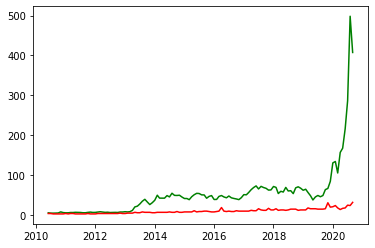

In [35]:
plt.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='green')  # fully specified color
plt.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], 'r')  # abbreviated color

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

<img src='https://matplotlib.org/stable/_images/sphx_glr_named_colors_003.png'>

Text(0, 0.5, 'Web Search Volume')

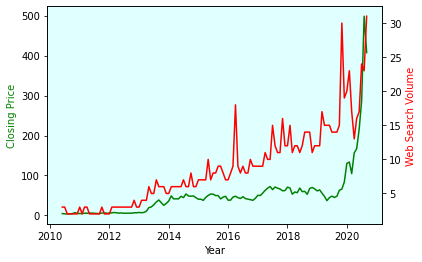

In [36]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis object, sharing the x axis
ax1.set_xlabel("Year")
ax1.set_facecolor("lightcyan")

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='green')  # fully specified color
ax1.set_ylabel("Closing Price", color="green")# fully specified color

ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], 'r')  # abbreviated color
ax2.set_ylabel("Web Search Volume", color="r")  # abbreviated color

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

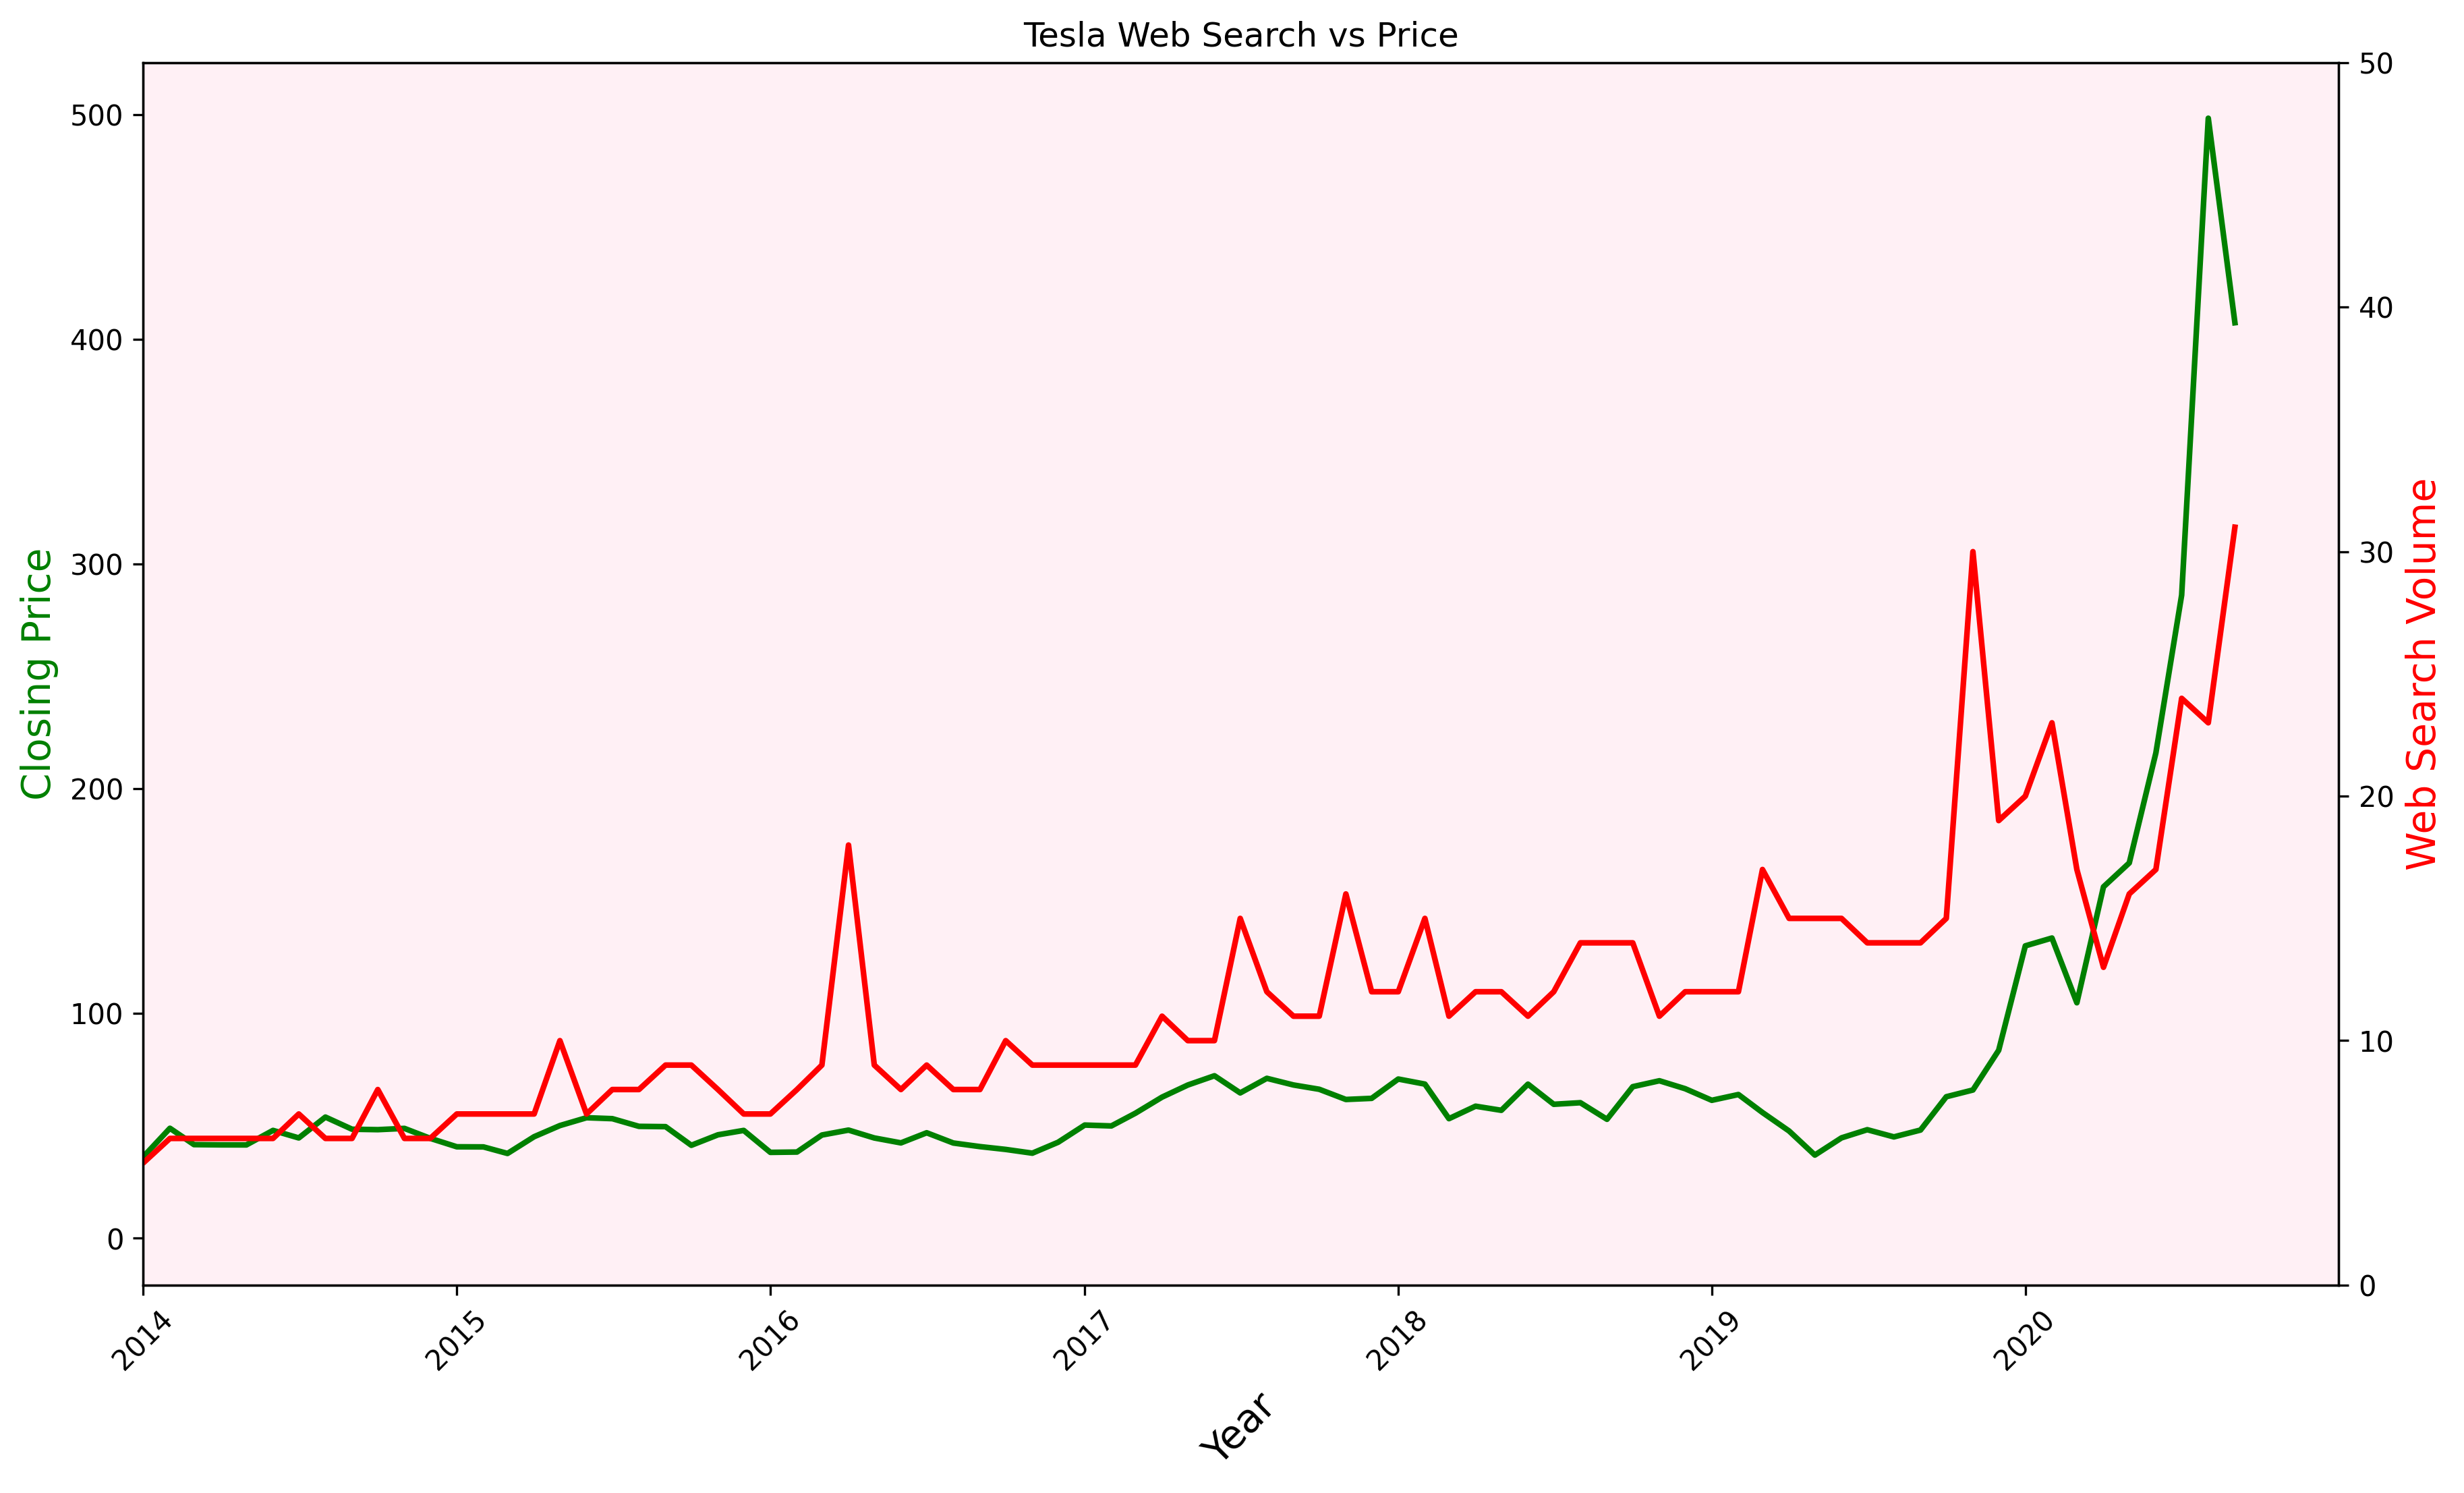

In [37]:
from datetime import datetime
plt.figure(figsize=(14,8), dpi=300)
plt.title("Tesla Web Search vs Price")
plt.xticks(rotation=45)  # Cannot use ax1.xticks(rotation=45)
# plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlabel("Year", fontsize=14, rotation=45)
ax1.set_facecolor("lavenderblush")  # Cannot use plt.set_facecolor("lavenderblush")

ax1.set_ylabel("Closing Price", color="green", fontsize=14)
x_limits = (datetime.fromisoformat("2014-01-01"), datetime.fromisoformat("2020-12-31"))
ax1.set_xlim(x_limits)
# ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='green', linewidth=2)

ax2.set_ylabel("Web Search Volume", color="r", fontsize=14)
ax2.set_ylim((0, 50))
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], 'r', linewidth=2)

plt.show()

## Notebook Formatting & Style Helpers

In [38]:
# Register date converters to avoid warning messages
"""
FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting
method. The converter was registered by pandas on import. Future versions of pandas will 
require you to explicitly register matplotlib converters.
"""
# I don't see the error, but anyway here's the fix:

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

How to add tick formatting for dates on the x-axis. 

In [39]:
import matplotlib.dates as mdates

# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

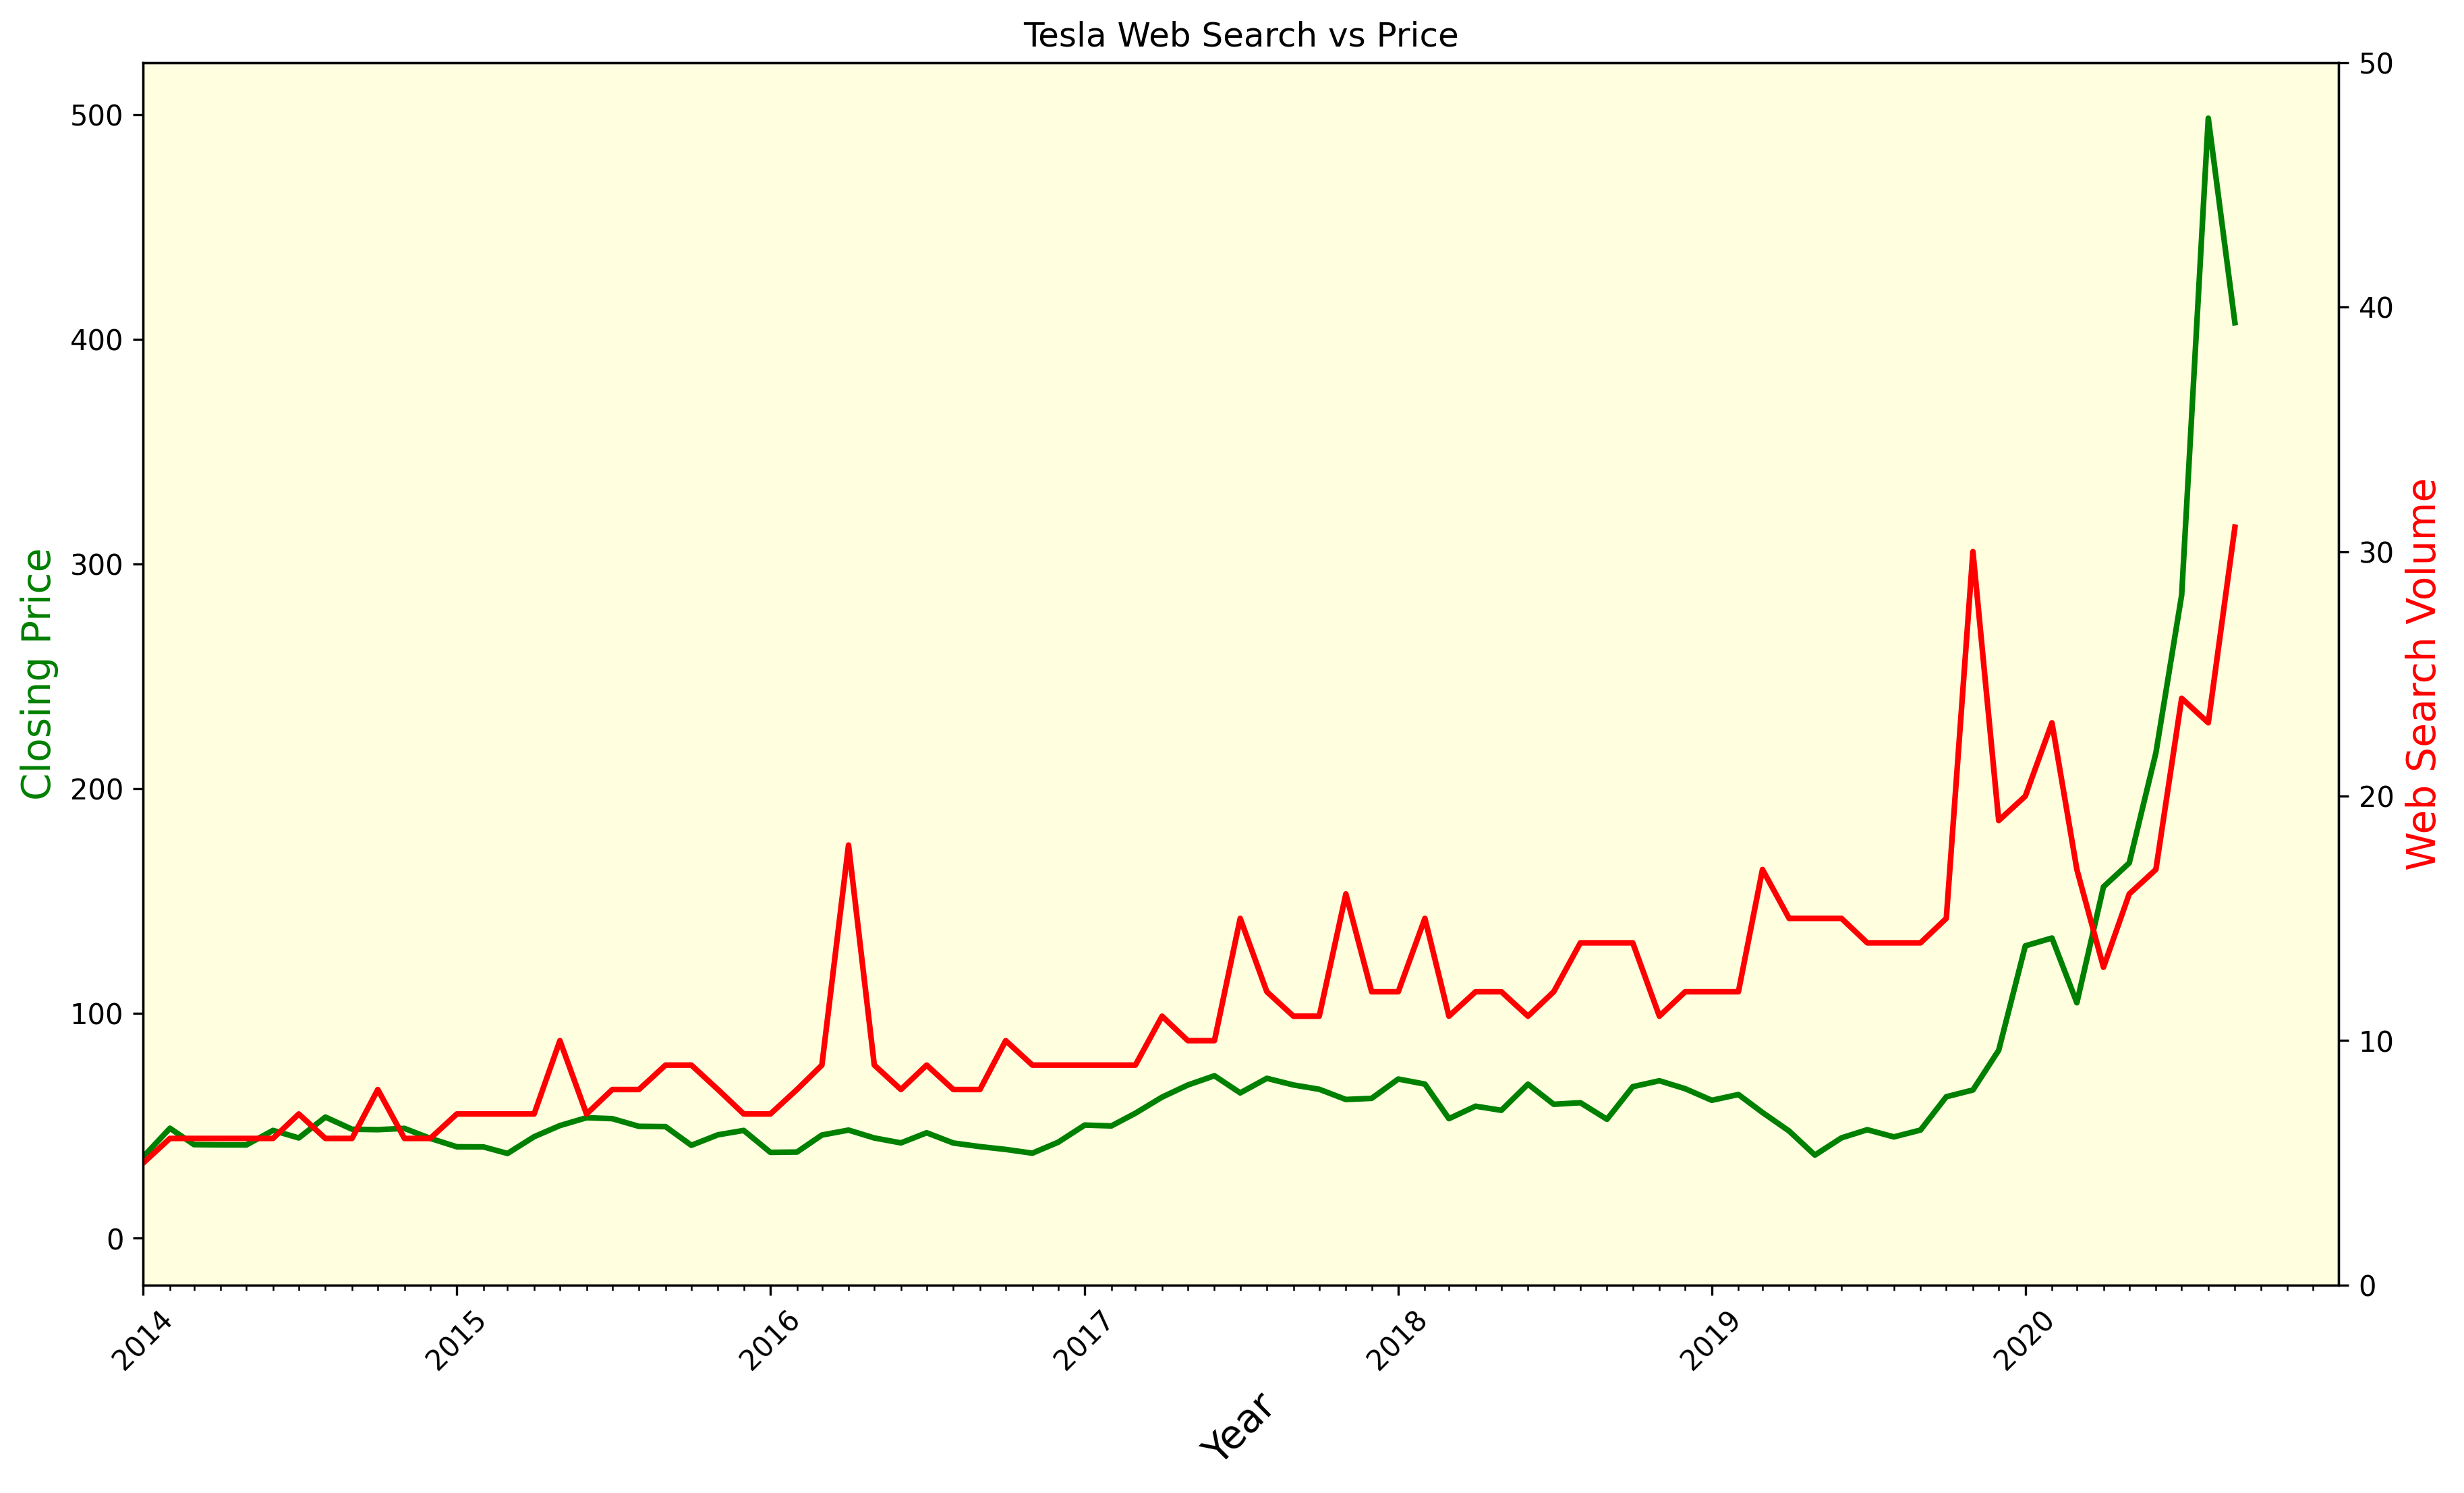

In [40]:
# from datetime import datetime
plt.figure(figsize=(14,8), dpi=300)
plt.title("Tesla Web Search vs Price")
plt.xticks(rotation=45)  # Cannot use ax1.xticks(rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlabel("Year", fontsize=14, rotation=45)
ax1.set_facecolor("lightyellow")  # Cannot use plt.set_facecolor("lavenderblush")


ax1.set_ylabel("Closing Price", color="green", fontsize=14)
x_limits = (datetime.fromisoformat("2014-01-01"), datetime.fromisoformat("2020-12-31"))
ax1.set_xlim(x_limits)
# ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='green', linewidth=2)

ax2.set_ylabel("Web Search Volume", color="r", fontsize=14)
ax2.set_ylim((0, 50))
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], 'r', linewidth=2)

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

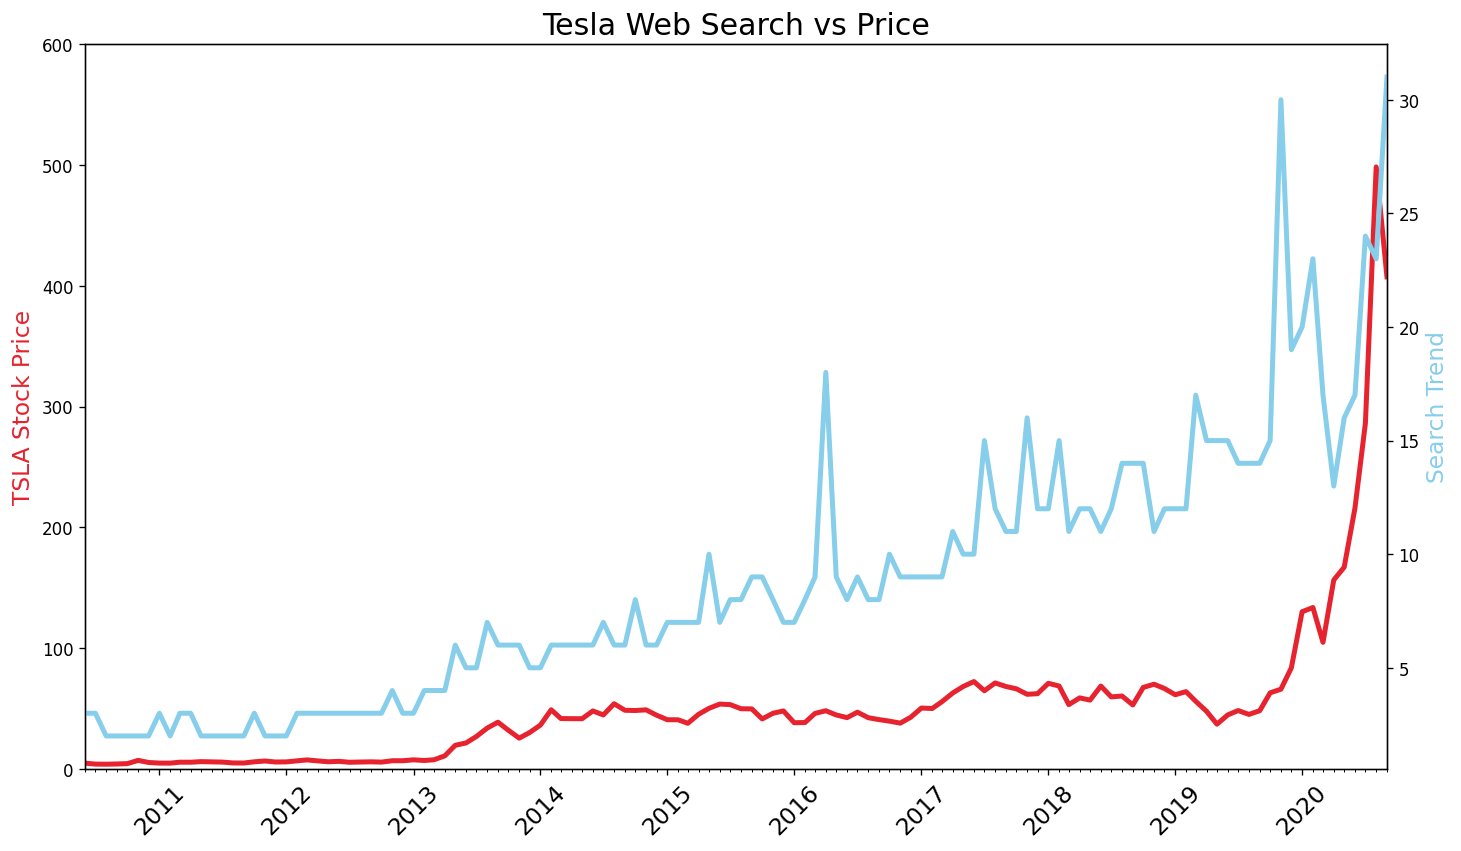

In [41]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18) 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)
# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?